In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Loading dataset into the dataframe

In [4]:
data_set = pd.read_excel('University advancement dataset.xlsx')

In [5]:
data_set.head()

,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,NaN,E,M,Graduate,Medicine -- General,1968,ON,73600,1997.0,1978.0,22080.0,0,N,0,27
1,100002,NaN,E,M,Graduate,Arts -- General,1958,NB,8035,1962.0,1961.0,1768.0,14,N,1,19
2,100003,NaN,E,F,Graduate,Science -- General,1963,ON,9675,1961.0,1961.0,3483.0,15,N,1,18
3,100004,NaN,,M,Graduate,Education -- General,1960,BC,4070,1990.0,1986.0,2768.0,14,N,2,10
4,100005,NaN,E,M,Graduate,Management,1955,QC,13377,1970.0,1957.0,3077.0,0,N,0,16


# Checking data for null values

Title, Preferred language,  - Lot of null values, might not be used to analyze, clustering can be used for chairman, CEO or president

In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID Number                       50000 non-null  int64  
 1   Title                           2490 non-null   object 
 2   Preferred Language              50000 non-null  object 
 3   Gender                          50000 non-null  object 
 4   Relationship Types              50000 non-null  object 
 5   Faculty of Graduation           50000 non-null  object 
 6   Year of Graduation              50000 non-null  int64  
 7   Province                        50000 non-null  object 
 8   Lifetime Giving                 50000 non-null  int64  
 9   Year of Last Gift               16086 non-null  float64
 10  Year of First Gift              16086 non-null  float64
 11  Largest Gift                    16088 non-null  float64
 12  Events Attended in Lifetime     

In [7]:
data_set.columns

Index(['ID Number', 'Title', 'Preferred Language', 'Gender',
       'Relationship Types', 'Faculty of Graduation', 'Year of Graduation',
       'Province', 'Lifetime Giving', 'Year of Last Gift',
       'Year of First Gift', 'Largest Gift', 'Events Attended in Lifetime',
       'Past Traveler Y/N', '# of Instances of Volunteering',
       '# of Clicks in the Past Month'],
      dtype='object')

In [8]:
data_set.describe()

,ID Number,Year of Graduation,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,# of Instances of Volunteering,# of Clicks in the Past Month
count,50000.000000,50000.000000,5.000000e+04,16086.000000,16086.000000,1.608800e+04,50000.000000,50000.000000,50000.000000
mean,125000.500000,1985.034260,4.782636e+03,1991.617058,1985.618737,6.856570e+03,7.496000,1.285700,12.105340
std,14433.901067,20.880956,1.371378e+05,17.985134,18.413239,6.143246e+04,4.592259,1.160578,6.860629
min,100001.000000,1929.000000,0.000000e+00,1934.000000,1933.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,112500.750000,1970.000000,0.000000e+00,1979.000000,1972.000000,5.300000e+01,4.000000,0.000000,6.000000
50%,125000.500000,1989.000000,0.000000e+00,1995.000000,1988.000000,5.020000e+02,8.000000,1.000000,13.000000
75%,137500.250000,2003.000000,1.050000e+02,2007.000000,2001.000000,6.259500e+03,11.000000,2.000000,18.000000
max,150000.000000,2015.000000,2.906088e+07,2015.000000,2015.000000,5.521567e+06,15.000000,3.000000,35.000000


In [9]:
data_set.isnull().sum()

ID Number                             0
Title                             47510
Preferred Language                    0
Gender                                0
Relationship Types                    0
Faculty of Graduation                 0
Year of Graduation                    0
Province                              0
Lifetime Giving                       0
Year of Last Gift                 33914
Year of First Gift                33914
Largest Gift                      33912
Events Attended in Lifetime           0
Past Traveler Y/N                     0
# of Instances of Volunteering        0
# of Clicks in the Past Month         0
dtype: int64

In [10]:
data_set["Year of Last Gift"].fillna(0, inplace = True)


In [11]:
data_set.isnull().sum()

ID Number                             0
Title                             47510
Preferred Language                    0
Gender                                0
Relationship Types                    0
Faculty of Graduation                 0
Year of Graduation                    0
Province                              0
Lifetime Giving                       0
Year of Last Gift                     0
Year of First Gift                33914
Largest Gift                      33912
Events Attended in Lifetime           0
Past Traveler Y/N                     0
# of Instances of Volunteering        0
# of Clicks in the Past Month         0
dtype: int64

In [12]:
data_set["Year of First Gift"].fillna(0, inplace = True)
data_set["Largest Gift"].fillna(0, inplace = True)
data_set.isnull().sum()

ID Number                             0
Title                             47510
Preferred Language                    0
Gender                                0
Relationship Types                    0
Faculty of Graduation                 0
Year of Graduation                    0
Province                              0
Lifetime Giving                       0
Year of Last Gift                     0
Year of First Gift                    0
Largest Gift                          0
Events Attended in Lifetime           0
Past Traveler Y/N                     0
# of Instances of Volunteering        0
# of Clicks in the Past Month         0
dtype: int64

In [15]:
df_1 = data_set[data_set['Lifetime Giving'] == 0]

In [16]:
df_1['Lifetime Giving'].value_counts()

0    33914
Name: Lifetime Giving, dtype: int64

# Cleaning the data 

In [17]:
data_set.Province = data_set.Province.apply(['ON', 'NB', 'BC', 'QC', 'SK', 'NS', 'AB', 'MB', 'NL', 'PE', 'NT','YT'].index)

In [18]:
data_set.Gender = data_set.Gender.apply(['M', 'F', 'U'].index)

In [19]:
data_set['Relationship Types']= data_set['Relationship Types'].apply(['Graduate', 'Graduate, Former Faculty/Staff',
       'Graduate, Past Student',
       'Graduate, Past Parent, Former Faculty/Staff',
       'Graduate, Former Faculty/Staff, Past Student',
       'Graduate, Past Parent', 'Graduate, Current Parent',
       'Graduate, Student', 'Graduate, Faculty/Staff',
       'Graduate, Grandparent, Past Parent',
       'Graduate, Former Faculty/Staff, Student', 'Graduate, Grandparent',
       'Graduate, Past Parent, Faculty/Staff',
       'Graduate, Grandparent, Former Faculty/Staff',
       'Graduate, Faculty/Staff, Past Student',
       'Graduate, Grandparent, Past Parent, Former Faculty/Staff',
       'Graduate, Current Parent, Faculty/Staff',
       'Graduate, Current Parent, Former Faculty/Staff',
       'Graduate, Current Parent, Past Student',
       'Graduate, Widow/er of a Grad',
       'Graduate, Past Parent, Past Student'].index)

In [20]:
data_set['Faculty of Graduation']= data_set['Faculty of Graduation'].apply(['Medicine -- General', 'Arts -- General', 'Science -- General',
       'Education -- General', 'Management', 'Engineer -- General',
       'Engineer -- Architect', 'Medicine -- Nursing', 'Law',
       'Agr&Env -- General', 'Medicine -- POT', 'Agr&Env -- Dietetics',
       'Arts -- Social Work', 'Arts -- Information (Library) Studies',
       'Dentistry', 'Music', 'Religious Studies', 'Continuing Education',
       'Engineer -- Urban', 'Medicine -- Com Sci', 'Arts -- MSE',
       'Science -- Computer', 'Science -- MSE', 'Agr&Env -- MSE',
       'UNKNOWN'].index)

In [21]:
data_set['Past Traveler Y/N'] = data_set['Past Traveler Y/N'].apply(['N', 'Y'].index)

In [22]:
data_set[(data_set['Lifetime Giving'] > 20000)]

,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month
0,100001,NaN,E,0,0,0,1968,0,73600,1997.0,1978.0,22080.0,0,0,0,27
8,100009,NaN,E,0,0,8,1959,0,125043,1958.0,1958.0,71275.0,7,0,1,28
14,100015,NaN,F,1,0,1,1965,1,45740,1979.0,1978.0,1372.0,9,0,0,15
23,100024,NaN,E,0,0,5,1954,0,21665,1954.0,1953.0,16249.0,3,0,2,17
25,100026,NaN,E,0,0,4,1964,0,103515,1981.0,1963.0,53828.0,3,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49970,149971,NaN,,1,0,1,1974,3,27151,2000.0,1991.0,11675.0,4,0,0,18
49971,149972,NaN,E,0,0,0,1996,3,26696,2002.0,1999.0,21357.0,5,0,3,15
49974,149975,NaN,E,1,0,2,1985,2,31594,1996.0,1987.0,13269.0,3,0,1,16
49983,149984,NaN,E,0,0,15,2008,3,49825,2006.0,2006.0,38864.0,6,1,2,16


* 33000 - approx 0
* 3483 - between 0 and 100
* 4115 - between 100 and 1000
* 2294 - between 1000 and 5000
* 2346 - between 5000 and 20000
* 3848 - more than 20000

## Create Donor Classes as per distribution above

DF with zero and non-zero donor classes

In [23]:
raw_data = data_set.copy()

In [24]:
raw_data['Donor Type'] = np.nan

In [25]:
for i in range(0,len(raw_data)):
    if (raw_data.loc[i][8] == 0):
        raw_data.at[i,'Donor Type'] = 0
    else:
        raw_data.at[i,'Donor Type'] = 1

In [26]:
raw_data

,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month,Donor Type
0,100001,NaN,E,0,0,0,1968,0,73600,1997.0,1978.0,22080.0,0,0,0,27,1.0
1,100002,NaN,E,0,0,1,1958,1,8035,1962.0,1961.0,1768.0,14,0,1,19,1.0
2,100003,NaN,E,1,0,2,1963,0,9675,1961.0,1961.0,3483.0,15,0,1,18,1.0
3,100004,NaN,,0,0,3,1960,2,4070,1990.0,1986.0,2768.0,14,0,2,10,1.0
4,100005,NaN,E,0,0,4,1955,3,13377,1970.0,1957.0,3077.0,0,0,0,16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,NaN,E,0,0,5,1960,0,9174,1970.0,1969.0,5504.0,15,1,1,1,1.0
49996,149997,NaN,E,1,0,1,1992,7,38181,1999.0,1993.0,35890.0,8,0,1,20,1.0
49997,149998,NaN,E,1,0,1,1974,3,0,0.0,0.0,0.0,3,1,2,5,0.0
49998,149999,NaN,E,0,0,1,1967,0,0,0.0,0.0,0.0,1,0,0,12,0.0


DF with non-zero donors, distributed to classes

In [27]:
df_1 = data_set[(data_set['Lifetime Giving'] > 0)]
df_1.reset_index(inplace=True)

In [28]:
df_1['Donor Class'] = np.nan

/var/folders/75/4l4td8zn2693tyx7ytdyh9v80000gn/T/ipykernel_25548/1173641066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Donor Class'] = np.nan


In [29]:
df_1

,index,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month,Donor Class
0,0,100001,NaN,E,0,0,0,1968,0,73600,1997.0,1978.0,22080.0,0,0,0,27,NaN
1,1,100002,NaN,E,0,0,1,1958,1,8035,1962.0,1961.0,1768.0,14,0,1,19,NaN
2,2,100003,NaN,E,1,0,2,1963,0,9675,1961.0,1961.0,3483.0,15,0,1,18,NaN
3,3,100004,NaN,,0,0,3,1960,2,4070,1990.0,1986.0,2768.0,14,0,2,10,NaN
4,4,100005,NaN,E,0,0,4,1955,3,13377,1970.0,1957.0,3077.0,0,0,0,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16081,49983,149984,NaN,E,0,0,15,2008,3,49825,2006.0,2006.0,38864.0,6,1,2,16,NaN
16082,49984,149985,NaN,,1,0,5,1993,0,12925,2009.0,2008.0,5299.0,6,0,0,17,NaN
16083,49994,149995,NaN,E,0,0,1,1948,9,4572,1968.0,1959.0,640.0,11,0,0,6,NaN
16084,49995,149996,NaN,E,0,0,5,1960,0,9174,1970.0,1969.0,5504.0,15,1,1,1,NaN


In [36]:
for i in range(0,len(df_1)):
    if (df_1.loc[i][9] <= 100):
        df_1.at[i,'Donor Class'] = 1
    if (df_1.loc[i][9] > 100) & (df_1.loc[i][9] <= 1000):
        df_1.at[i,'Donor Class'] = 2
    if (df_1.loc[i][9] > 1000) & (df_1.loc[i][9] <= 5000):
        df_1.at[i,'Donor Class'] = 3
    if (df_1.loc[i][9] > 5000) & (df_1.loc[i][9] <= 20000):
        df_1.at[i,'Donor Class'] = 4
    if (df_1.loc[i][9] >= 20000):
        df_1.at[i,'Donor Class'] = 5

In [37]:
df_1

,index,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month,Donor Class,Donor Class 2
0,0,100001,NaN,E,0,0,0,1968,0,73600,1997.0,1978.0,22080.0,0,0,0,27,5.0,1.0
1,1,100002,NaN,E,0,0,1,1958,1,8035,1962.0,1961.0,1768.0,14,0,1,19,4.0,1.0
2,2,100003,NaN,E,1,0,2,1963,0,9675,1961.0,1961.0,3483.0,15,0,1,18,4.0,1.0
3,3,100004,NaN,,0,0,3,1960,2,4070,1990.0,1986.0,2768.0,14,0,2,10,3.0,0.0
4,4,100005,NaN,E,0,0,4,1955,3,13377,1970.0,1957.0,3077.0,0,0,0,16,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16081,49983,149984,NaN,E,0,0,15,2008,3,49825,2006.0,2006.0,38864.0,6,1,2,16,5.0,1.0
16082,49984,149985,NaN,,1,0,5,1993,0,12925,2009.0,2008.0,5299.0,6,0,0,17,4.0,1.0
16083,49994,149995,NaN,E,0,0,1,1948,9,4572,1968.0,1959.0,640.0,11,0,0,6,3.0,0.0
16084,49995,149996,NaN,E,0,0,5,1960,0,9174,1970.0,1969.0,5504.0,15,1,1,1,4.0,1.0


Donor Class 2 - Based on 2 clusters

In [38]:
df_1['Donor Class 2'] = np.nan

/var/folders/75/4l4td8zn2693tyx7ytdyh9v80000gn/T/ipykernel_25548/4180756749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Donor Class 2'] = np.nan


In [39]:
for i in range(0,len(df_1)):
    if (df_1.loc[i][9] < 5000):
        df_1.at[i,'Donor Class 2'] = 0
    else:
        df_1.at[i,'Donor Class 2'] = 1

In [40]:
df_1[(df_1['Donor Class 2'] == 1)]

,index,ID Number,Title,Preferred Language,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month,Donor Class,Donor Class 2
0,0,100001,NaN,E,0,0,0,1968,0,73600,1997.0,1978.0,22080.0,0,0,0,27,5.0,1.0
1,1,100002,NaN,E,0,0,1,1958,1,8035,1962.0,1961.0,1768.0,14,0,1,19,4.0,1.0
2,2,100003,NaN,E,1,0,2,1963,0,9675,1961.0,1961.0,3483.0,15,0,1,18,4.0,1.0
4,4,100005,NaN,E,0,0,4,1955,3,13377,1970.0,1957.0,3077.0,0,0,0,16,4.0,1.0
8,8,100009,NaN,E,0,0,8,1959,0,125043,1958.0,1958.0,71275.0,7,0,1,28,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16079,49974,149975,NaN,E,1,0,2,1985,2,31594,1996.0,1987.0,13269.0,3,0,1,16,5.0,1.0
16081,49983,149984,NaN,E,0,0,15,2008,3,49825,2006.0,2006.0,38864.0,6,1,2,16,5.0,1.0
16082,49984,149985,NaN,,1,0,5,1993,0,12925,2009.0,2008.0,5299.0,6,0,0,17,4.0,1.0
16084,49995,149996,NaN,E,0,0,5,1960,0,9174,1970.0,1969.0,5504.0,15,1,1,1,4.0,1.0


## Outliers - Liftime Gift & Largest Gift

In [41]:
quant = data_set['Lifetime Giving'].quantile(0.997)
print(quant)

49691.003


Dataset with donation value less than LTG(99.7%)

In [42]:
data_set_1= df_1[df_1['Lifetime Giving']<quant]

In [43]:
data_set_1.describe()

,index,ID Number,Gender,Relationship Types,Faculty of Graduation,Year of Graduation,Province,Lifetime Giving,Year of Last Gift,Year of First Gift,Largest Gift,Events Attended in Lifetime,Past Traveler Y/N,# of Instances of Volunteering,# of Clicks in the Past Month,Donor Class,Donor Class 2
count,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000
mean,21576.343938,121577.343938,0.535894,0.250188,4.131714,1980.769265,2.316014,10228.479982,1991.691014,1985.696787,5017.523783,7.444403,0.092620,1.288341,13.358371,2.916039,0.379769
std,14534.203381,14534.203381,0.499103,1.086919,4.146157,18.831062,2.234124,14683.646358,17.978055,18.416730,8766.238379,4.591508,0.289909,1.160918,6.456440,1.483634,0.485345
min,1.000000,100002.000000,0.000000,0.000000,0.000000,1929.000000,0.000000,1.000000,1934.000000,1933.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,9078.500000,109079.500000,0.000000,0.000000,1.000000,1967.000000,0.000000,131.500000,1979.000000,1973.000000,52.000000,3.000000,0.000000,0.000000,8.000000,2.000000,0.000000
50%,20079.000000,120080.000000,1.000000,0.000000,3.000000,1982.000000,2.000000,1265.000000,1995.000000,1988.000000,484.000000,7.000000,0.000000,1.000000,15.000000,3.000000,0.000000
75%,33577.250000,133578.250000,1.000000,0.000000,5.000000,1996.000000,3.000000,17980.000000,2007.000000,2001.000000,5998.750000,11.000000,0.000000,2.000000,18.000000,4.000000,1.000000
max,49996.000000,149997.000000,2.000000,17.000000,24.000000,2015.000000,11.000000,49691.000000,2015.000000,2015.000000,48357.000000,15.000000,1.000000,3.000000,23.000000,5.000000,1.000000


In [44]:
df_1[df_1['Lifetime Giving']>50000]['Province'].value_counts()

0    37
3    32
2    21
6    11
1     9
5     6
4     3
7     1
Name: Province, dtype: int64

<AxesSubplot:xlabel='Lifetime Giving', ylabel='Largest Gift'>

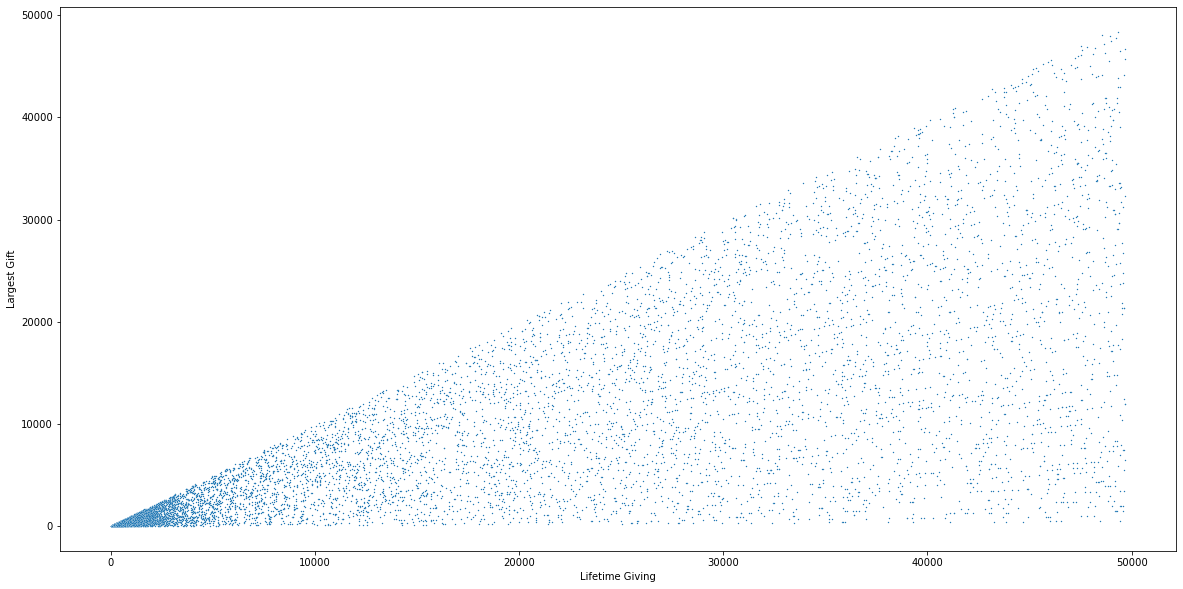

In [45]:
plt.figure(figsize = (20, 10))
sns.scatterplot(x=data_set_1['Lifetime Giving'], y=data_set_1['Largest Gift'] ,s=2)

# EDA

- Province - Ontario, Alberta, NB,QC, BC strong givings
- Clicks - Most donation by clicks between 10-15
- Faculty of Graduation - strong givings - 'Arts -- General'(1), 'Science -- General'(2),'Management'(4),'Engineer -- General(5)

- No Relation - Year of Graduation, Events attended, Volunteering, Yr Fist, Yr Last,Relationship (very unclear relations) 

## Target vs Feature

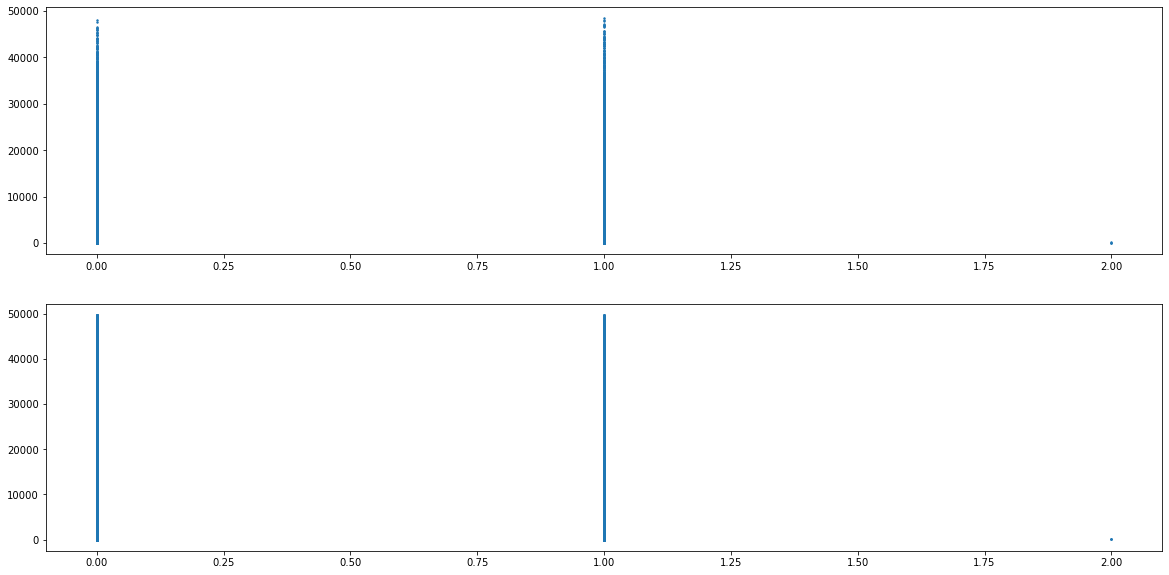

In [46]:
plt.figure(figsize = (20, 10))
plt.subplot(2,1,1)
plt.scatter(x=data_set_1['Gender'], y=data_set_1['Largest Gift'] ,s=2)

plt.subplot(2,1,2)
plt.scatter(x=data_set_1['Gender'], y=data_set_1['Lifetime Giving'] ,s=2)

In [47]:
data_1['Gender'].value_counts()

NameError: name 'data_1' is not defined

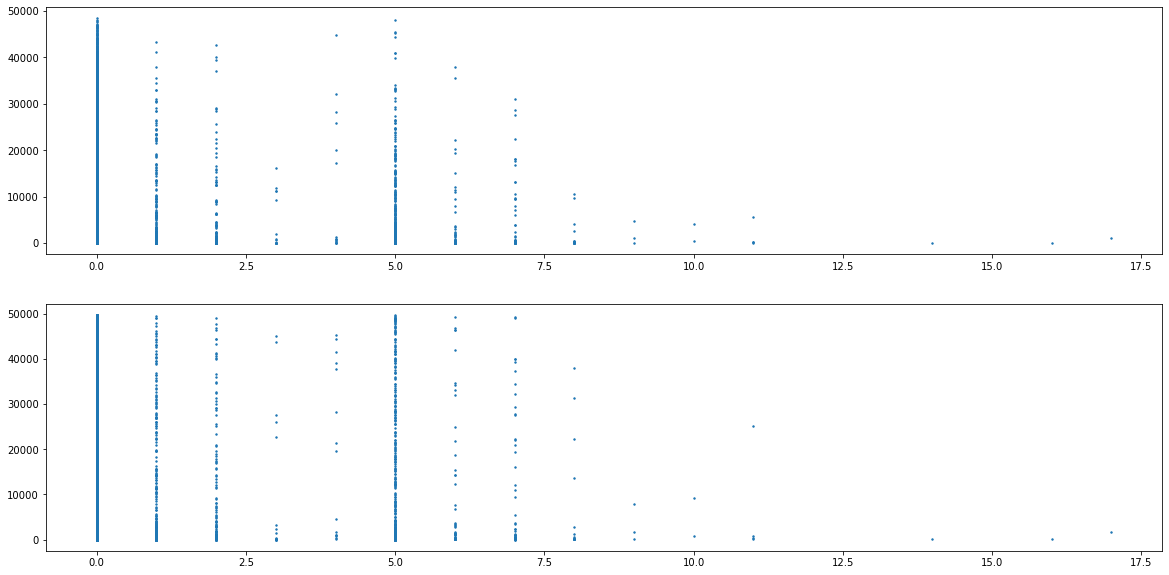

In [48]:
plt.figure(figsize = (20, 10))
plt.subplot(2,1,1)
plt.scatter(x=data_set_1['Relationship Types'], y=data_set_1['Largest Gift'] ,s=2)

plt.subplot(2,1,2)
plt.scatter(x=data_set_1['Relationship Types'], y=data_set_1['Lifetime Giving'] ,s=2)

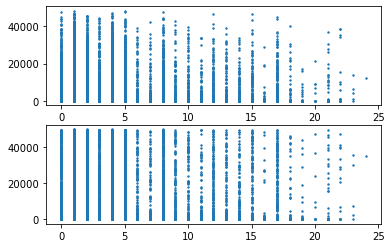

In [49]:
#plt.figure(figsize = (20, 10))
plt.subplot(2,1,1)
plt.scatter(x=data_set_1['Faculty of Graduation'], y=data_set_1['Largest Gift'] ,s=2)

plt.subplot(2,1,2)
plt.scatter(x=data_set_1['Faculty of Graduation'], y=data_set_1['Lifetime Giving'] ,s=2)

In [50]:
#data_set_1['Faculty of Graduation'].value_counts()

'Arts -- General', 1
'Science -- General', 2
'Management', 4
'Engineer -- General - 5

(array([9.390e+02, 4.644e+03, 2.180e+03, 6.940e+02, 2.560e+03, 1.526e+03,
        2.220e+02, 2.150e+02, 9.160e+02, 2.920e+02, 2.670e+02, 1.310e+02,
        3.000e+02, 1.790e+02, 2.200e+02, 2.140e+02, 3.000e+01, 2.810e+02,
        3.800e+01, 2.100e+01, 1.000e+01, 3.500e+01, 1.600e+01, 5.000e+00,
        1.000e+00]),
 array([ 0.  ,  0.96,  1.92,  2.88,  3.84,  4.8 ,  5.76,  6.72,  7.68,
         8.64,  9.6 , 10.56, 11.52, 12.48, 13.44, 14.4 , 15.36, 16.32,
        17.28, 18.24, 19.2 , 20.16, 21.12, 22.08, 23.04, 24.  ]),
 <BarContainer object of 25 artists>)

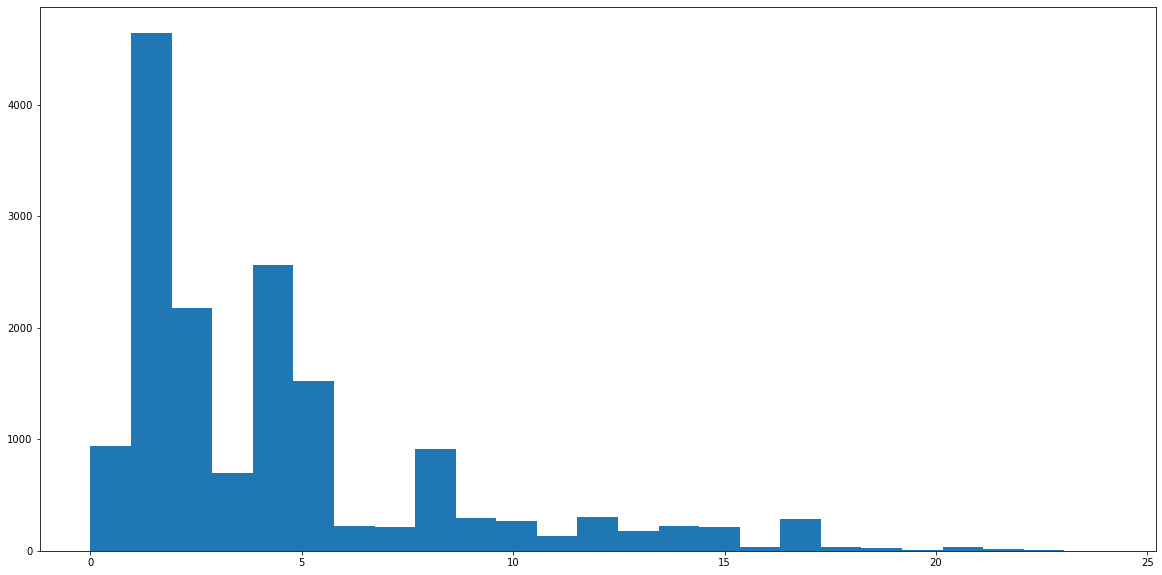

In [51]:
plt.figure(figsize = (20, 10))
plt.hist(data_set_1['Faculty of Graduation'], bins=25)

(array([5360., 1083., 2139., 4085.,  477.,  530., 1515.,  463.,  192.,
          64.,   17.,   11.]),
 array([ 0.        ,  0.91666667,  1.83333333,  2.75      ,  3.66666667,
         4.58333333,  5.5       ,  6.41666667,  7.33333333,  8.25      ,
         9.16666667, 10.08333333, 11.        ]),
 <BarContainer object of 12 artists>)

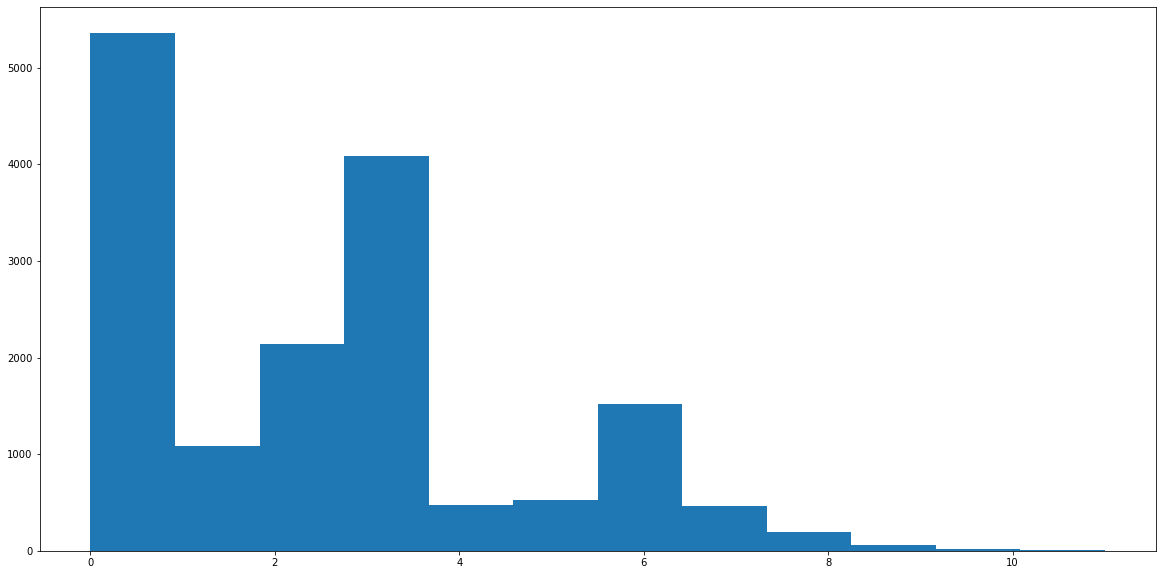

In [52]:
plt.figure(figsize = (20, 10))
plt.hist(data_set_1['Province'], bins=12)

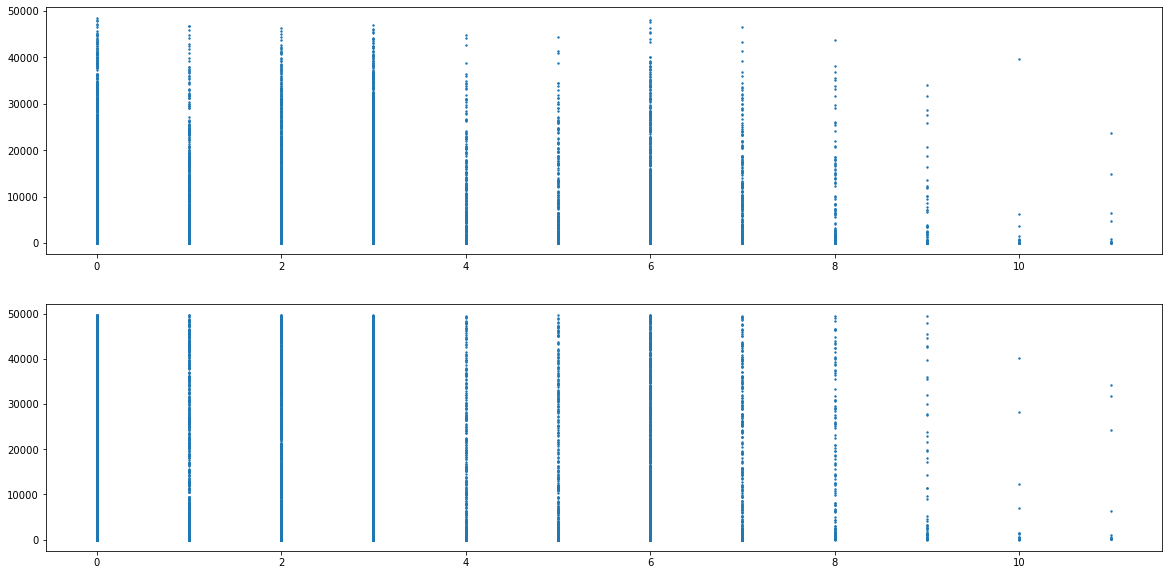

In [53]:
plt.figure(figsize = (20, 10))
plt.subplot(2,1,1)
plt.scatter(x=data_set_1['Province'], y=data_set_1['Largest Gift'] ,s=2)

plt.subplot(2,1,2)
plt.scatter(x=data_set_1['Province'], y=data_set_1['Lifetime Giving'] ,s=2)

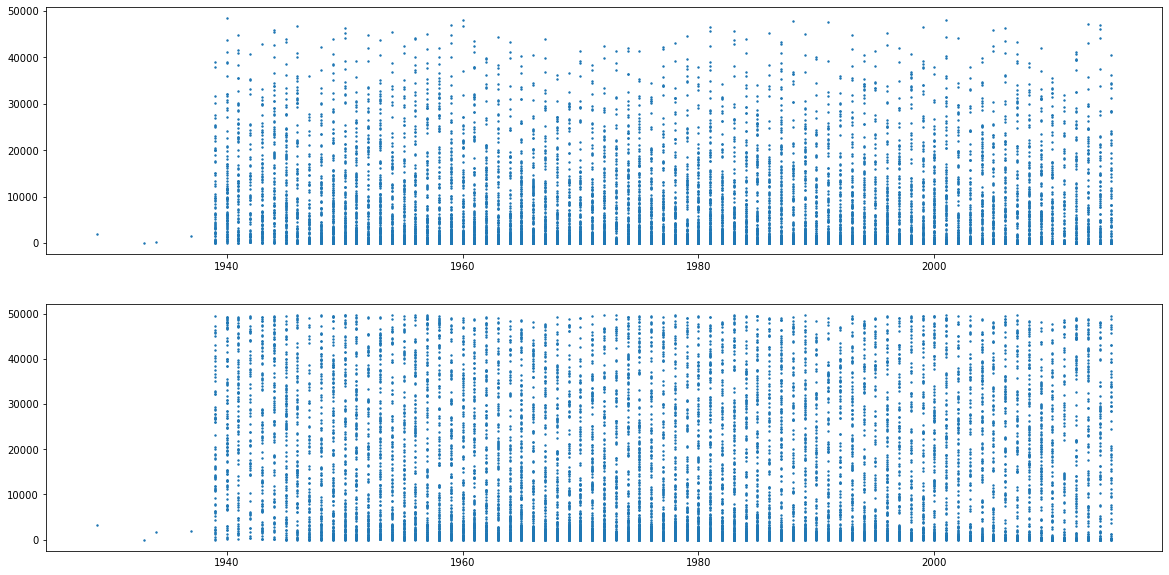

In [54]:
plt.figure(figsize = (20, 10))
plt.subplot(2,1,1)
plt.scatter(x=data_set_1['Year of Graduation'], y=data_set_1['Largest Gift'] ,s=2)

plt.subplot(2,1,2)
plt.scatter(x=data_set_1['Year of Graduation'], y=data_set_1['Lifetime Giving'] ,s=2)

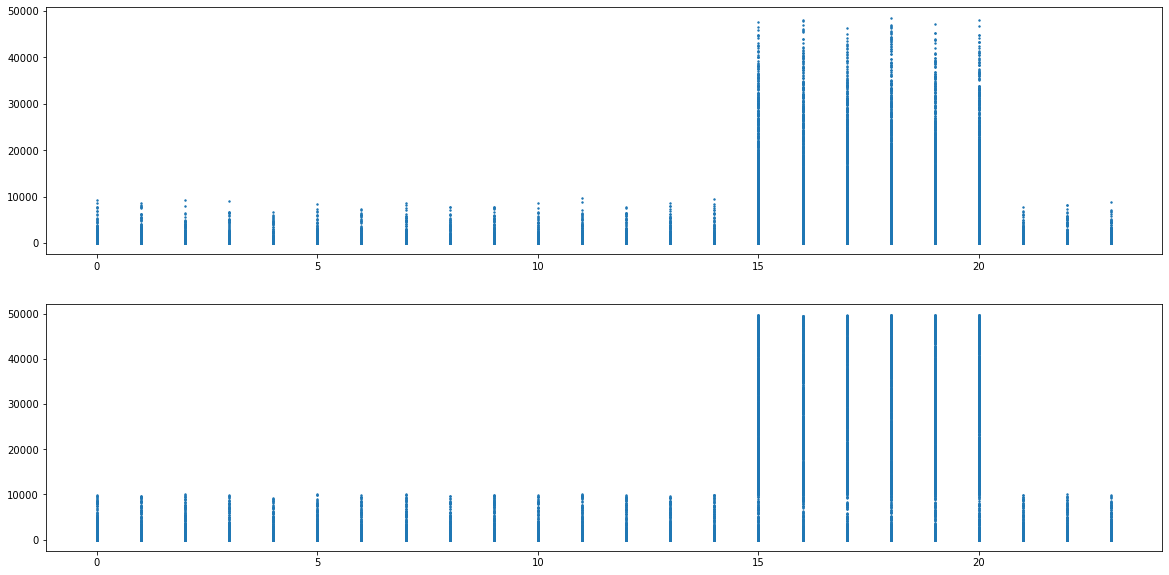

In [55]:
plt.figure(figsize = (20, 10))
plt.subplot(2,1,1)
plt.scatter(x=data_set_1['# of Clicks in the Past Month'], y=data_set_1['Largest Gift'] ,s=2)

plt.subplot(2,1,2)
plt.scatter(x=data_set_1['# of Clicks in the Past Month'], y=data_set_1['Lifetime Giving'] ,s=2)

Most click range - 15 to 20

(array([3483.,    0., 4115.,    0.,    0., 2294.,    0., 2345.,    0.,
        3699.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

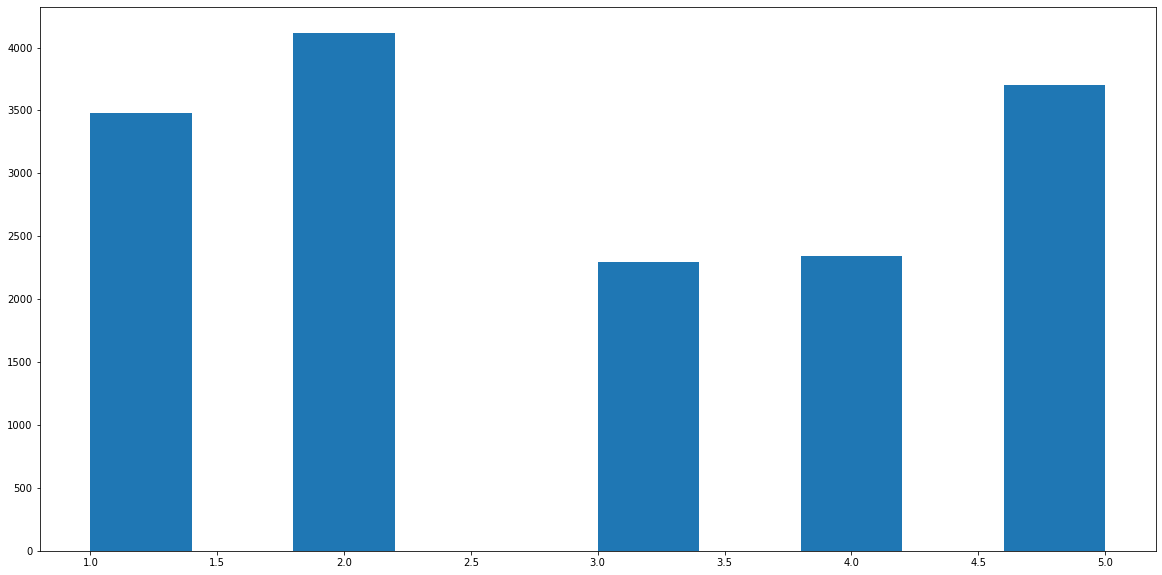

In [56]:
plt.figure(figsize = (20, 10))

plt.hist(data_set_1['Donor Class'])


## Feature vs Feature

'Arts -- General', 1
'Science -- General', 2
'Management', 4
'Engineer -- General - 5

NameError: name 'data_1' is not defined

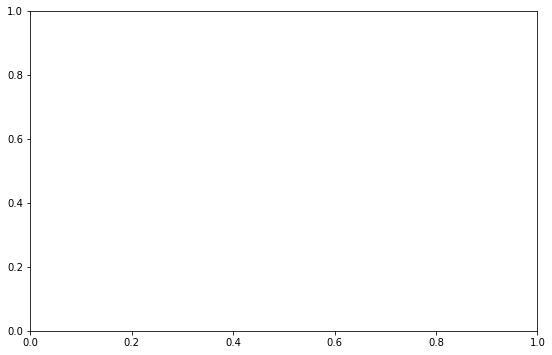

In [57]:
plt.figure(figsize = (20, 20))
plt.subplot(3,2,1)
plt.hist(data_1[data_1['Faculty of Graduation']==1]['Donor Class'])
plt.title('Arts-Gen')

plt.subplot(3,2,2)
plt.hist(data_1[data_1['Faculty of Graduation']==2]['Donor Class'])
plt.title('Sci - Gen')

plt.subplot(3,2,3)
plt.hist(data_1[data_1['Faculty of Graduation']==4]['Donor Class'])
plt.title('Managment')

plt.subplot(3,2,4)
plt.hist(data_1[data_1['Faculty of Graduation']==5]['Donor Class'])
plt.title('Engg-Gen')

# Decision Tree 

## Model 1 - Predict Donor Type based on RAW_DATA

In [58]:
from sklearn.model_selection import train_test_split
data_X = raw_data[['Gender', 'Faculty of Graduation','Province', '# of Clicks in the Past Month']]
data_Y = raw_data["Donor Type"]
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size = 0.3, train_size = 0.7)

In [59]:
D_Tree = tree.DecisionTreeClassifier()
D_Tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
print(D_Tree.feature_importances_)
print(X_train.columns)

[0.08888085 0.19635417 0.22838315 0.48638182]
Index(['Gender', 'Faculty of Graduation', 'Province',
       '# of Clicks in the Past Month'],
      dtype='object')


In [61]:
print('Tree depth: ', D_Tree.get_depth())
print('Number of leaf nodes: ', D_Tree.get_n_leaves())

Tree depth:  23
Number of leaf nodes:  4288


In [62]:
print('training set accuracy: ', D_Tree.score(X_train, y_train) * 100, 2)

training set accuracy:  73.69142857142857 2


In [63]:
D_Tree_predictions = D_Tree.predict(X_test)
print(D_Tree_predictions)
print(y_test)



[0. 0. 0. ... 0. 0. 0.]
46549    0.0
20370    0.0
28160    0.0
26843    0.0
9099     0.0
        ... 
7611     1.0
22045    0.0
29575    0.0
14180    0.0
30349    0.0
Name: Donor Type, Length: 15000, dtype: float64


In [64]:
print('test set accuracy: ', D_Tree.score(X_test, y_test)*100, 2)

test set accuracy:  66.37333333333333 2


## Model 2 - Predict Donor Type based on DATA_SET_1 

In [65]:
data_X = data_set_1[['Gender','Faculty of Graduation','Province','# of Clicks in the Past Month']]
data_Y = data_set_1["Donor Class 2"]
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size = 0.2, train_size = 0.8)

In [66]:
D_Tree = tree.DecisionTreeClassifier()
D_Tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [67]:
print(D_Tree.feature_importances_)
print(X_train.columns)

[0.03667643 0.09304774 0.07292007 0.79735576]
Index(['Gender', 'Faculty of Graduation', 'Province',
       '# of Clicks in the Past Month'],
      dtype='object')


In [68]:
print('Tree depth: ', D_Tree.get_depth())
print('Number of leaf nodes: ', D_Tree.get_n_leaves())

Tree depth:  23
Number of leaf nodes:  1928


In [69]:
print('training set accuracy: ', D_Tree.score(X_train, y_train) * 100, 2)

training set accuracy:  83.98964543457798 2


In [70]:
D_Tree_predictions = D_Tree.predict(X_test)
print(D_Tree_predictions)
print(y_test)

[0. 1. 1. ... 1. 1. 0.]
4147     0.0
11965    1.0
14640    1.0
518      0.0
15777    1.0
        ... 
14354    1.0
7125     0.0
11098    1.0
5126     0.0
9519     0.0
Name: Donor Class 2, Length: 3188, dtype: float64


In [71]:
print('test set accuracy: ', D_Tree.score(X_test, y_test)*100, 2)

test set accuracy:  76.16060225846925 2


## Model 3 - Random Forest - Donor Type based on DATA_SET_1 

In [72]:
data_X = data_set_1[['Gender','Faculty of Graduation','Province','# of Clicks in the Past Month']]
data_Y = data_set_1["Donor Class 2"]
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size = 0.2, train_size = 0.8)

In [73]:
Random_Frst = RandomForestClassifier(criterion = 'gini', n_estimators = 150)
Random_Frst.fit(X_train, y_train)
print('training set accuracy: ', Random_Frst.score(X_train, y_train) * 100, 2)
print('test set accuracy: ',Random_Frst.score(X_test, y_test)*100, 2)

training set accuracy:  83.51113900219642 2
test set accuracy:  79.17189460476789 2


In [74]:
D_Tree = tree.DecisionTreeClassifier()
D_Tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [75]:
print(D_Tree.feature_importances_)
print(X_train.columns)

[0.03521953 0.09099006 0.08437028 0.78942013]
Index(['Gender', 'Faculty of Graduation', 'Province',
       '# of Clicks in the Past Month'],
      dtype='object')


In [76]:
print('Tree depth: ', D_Tree.get_depth())
print('Number of leaf nodes: ', D_Tree.get_n_leaves())

Tree depth:  23
Number of leaf nodes:  1956


In [77]:
print('training set accuracy: ', D_Tree.score(X_train, y_train) * 100, 2)

training set accuracy:  83.51113900219642 2


In [78]:
D_Tree_predictions = D_Tree.predict(X_test)
print(D_Tree_predictions)
print(y_test)

[0. 0. 1. ... 0. 0. 1.]
6483     0.0
7360     0.0
15553    1.0
2611     0.0
7117     0.0
        ... 
2068     0.0
9354     0.0
2832     0.0
8201     0.0
13962    1.0
Name: Donor Class 2, Length: 3188, dtype: float64


In [79]:
print('test set accuracy: ',D_Tree.score(X_test, y_test)*100, 2)

test set accuracy:  77.25846925972397 2
